In [2]:
from mynn import *
prefix = "uniform-direct"
θ, κ = preprocess_data()
# 250, 250.2, 250.4 ... 300
θ_train, κ_train = θ[0::2], κ[:, :,  0::2]
# 250.1, 250.3, 250.5 ... 299.9
θ_test, κ_test = θ[1::2], κ[:, :,  1::2]

data_svd, bases, N_trunc = build_bases(κ_train, acc=0.9999)


x_train = torch.from_numpy(θ_train.astype(np.float32)).unsqueeze(-1) 
y_train = torch.from_numpy(data_svd.astype(np.float32))

N_trunc =  4


In [33]:
N_θ = 1
model = DirectKernelRomNet(N_θ, N_trunc)
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)


n_epochs = 50000
for epoch in range(n_epochs):
    
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x_train)

    # Compute and print loss.
    loss = loss_fn(y_pred, y_train)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
        
    if epoch % 10000 == 0:
        print("[{}/{}], loss: {}".format(epoch, n_epochs, np.round(loss.item(), 3)))
        torch.save(model, "DirectKernelRomNet.model")

	
# save the model
torch.save(model, "DirectKernelRomNet.model")

[0/50000], loss: 40189.918
[100/50000], loss: 1465.562
[200/50000], loss: 3.562
[300/50000], loss: 0.166
[400/50000], loss: 0.148
[500/50000], loss: 0.131
[600/50000], loss: 0.114
[700/50000], loss: 0.096
[800/50000], loss: 0.072
[900/50000], loss: 0.049
[1000/50000], loss: 0.041
[1100/50000], loss: 0.038
[1200/50000], loss: 0.036
[1300/50000], loss: 0.034
[1400/50000], loss: 0.033
[1500/50000], loss: 0.033
[1600/50000], loss: 0.032
[1700/50000], loss: 0.031
[1800/50000], loss: 0.031
[1900/50000], loss: 0.03
[2000/50000], loss: 0.029
[2100/50000], loss: 0.028
[2200/50000], loss: 0.028
[2300/50000], loss: 0.027
[2400/50000], loss: 0.026
[2500/50000], loss: 0.025
[2600/50000], loss: 0.025
[2700/50000], loss: 0.023
[2800/50000], loss: 0.023
[2900/50000], loss: 0.022
[3000/50000], loss: 0.021
[3100/50000], loss: 0.02
[3200/50000], loss: 0.019
[3300/50000], loss: 0.019
[3400/50000], loss: 0.018
[3500/50000], loss: 0.017
[3600/50000], loss: 0.016
[3700/50000], loss: 0.016
[3800/50000], loss:

[31000/50000], loss: 0.001
[31100/50000], loss: 0.001
[31200/50000], loss: 0.008
[31300/50000], loss: 0.003
[31400/50000], loss: 0.006
[31500/50000], loss: 0.002
[31600/50000], loss: 0.007
[31700/50000], loss: 0.002
[31800/50000], loss: 0.008
[31900/50000], loss: 0.117
[32000/50000], loss: 0.004
[32100/50000], loss: 0.003
[32200/50000], loss: 0.07
[32300/50000], loss: 0.076
[32400/50000], loss: 0.001
[32500/50000], loss: 0.001
[32600/50000], loss: 0.006
[32700/50000], loss: 0.002
[32800/50000], loss: 0.056
[32900/50000], loss: 0.029
[33000/50000], loss: 0.013
[33100/50000], loss: 0.003
[33200/50000], loss: 0.053
[33300/50000], loss: 0.004
[33400/50000], loss: 0.001
[33500/50000], loss: 0.001
[33600/50000], loss: 0.001
[33700/50000], loss: 0.009
[33800/50000], loss: 0.019
[33900/50000], loss: 0.016
[34000/50000], loss: 0.01
[34100/50000], loss: 0.001
[34200/50000], loss: 0.001
[34300/50000], loss: 0.001
[34400/50000], loss: 0.002
[34500/50000], loss: 0.002
[34600/50000], loss: 0.001
[34

In [5]:
######################################################
N_θ = 1
N_data  =  θ_test.shape
N_x, N_y, N_data = κ_test.shape

L = 1.0
xx = np.linspace(0, L, N_x)
Y, X = np.meshgrid(xx, xx)

model = torch.load("DirectKernelRomNet.model")
κ_pred = model(torch.from_numpy(θ_test.astype(np.float32)).unsqueeze(-1)).detach().numpy()
κs_pred = np.zeros((N_x, N_y, N_data))
for i in range(N_data):
    κs_pred[:,:,i] = np.dot(κ_pred[i, :]  , bases).reshape(N_x, N_y)

test_ids = np.arange(0, N_data)
errors = np.zeros(len(test_ids))



AttributeError: 'DirectKernelRomNet' object has no attribute 'fc2'

Average error is  0.04137164178082468


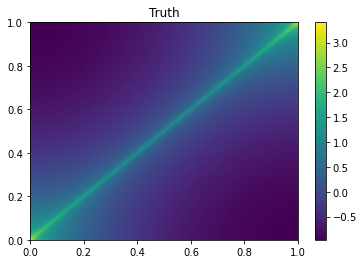

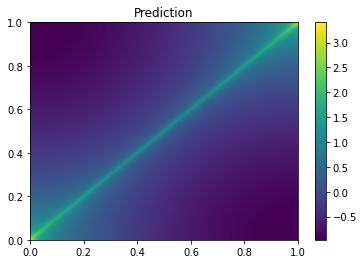

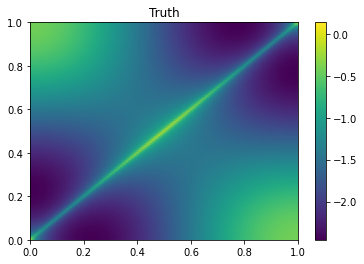

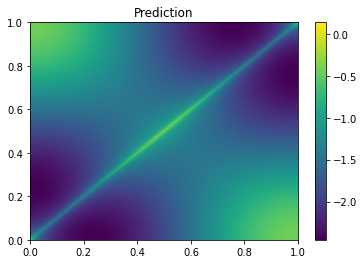

In [39]:
for test_id in test_ids:

    errors[test_id] =  np.linalg.norm(κs_pred[:, :, test_id] - κ_test[:, :, test_id])/np.linalg.norm(κ_test[:, :, test_id])
    # print(prefix+"data %i, relative error is %.5f:" % (test_id, errors[test_id]))

    if test_id %249 == 0:
        vmin, vmax = np.min(κ_test[:, :, test_id]), np.max(κ_test[:, :, test_id])
        fig = plt.figure()
        plt.pcolormesh(X, Y, κ_test[:, :, test_id], shading="gouraud", vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title("Truth")
        fig.savefig(prefix+"Truth_%04i.png" % test_id)

        fig = plt.figure()
        plt.pcolormesh(X, Y, κs_pred[:, :, test_id], shading="gouraud", vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title("Prediction")
        fig.savefig(prefix+"Prediction_%04i.png" % test_id)

print("Average error is ", np.average(errors))




<ipython-input-17-183d24debd3e>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, bases[i, :].reshape(N_x, N_y), vmin=-20, vmax=20, cmap="gray")


<Figure size 432x288 with 0 Axes>

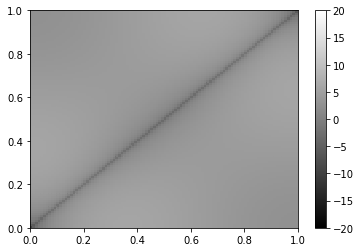

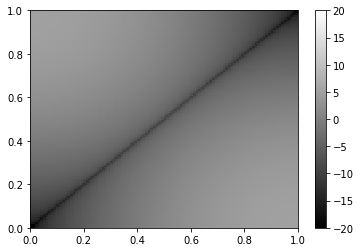

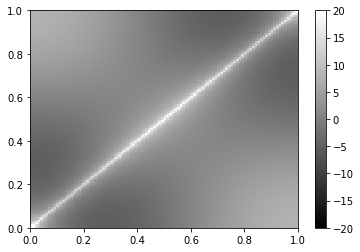

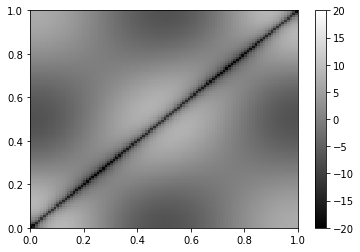

In [17]:
L = 1.0
xx = np.linspace(0, L, N_x)
Y, X = np.meshgrid(xx, xx)
N_x, N_y, N_data = κ_test.shape

fig = plt.figure()
for i in range(4):
    plt.figure()
    plt.pcolormesh(X, Y, bases[i, :].reshape(N_x, N_y), vmin=-20, vmax=20, cmap="gray")
    plt.colorbar()

        
